# Libraries

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns

# for data exploration
import functions as ft

# for setting option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# for modeling
from sklearn.linear_model import LogisticRegression

# Loading Data

In [2]:
app_train = pd.read_csv("Data/dseb63_application_train.csv", index_col=0)
app_train = app_train[['SK_ID_CURR']+list(app_train.columns[:-1])]
print("Training dataset shape:", app_train.shape)
app_train.head()

Training dataset shape: (246009, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,278621,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,NaN,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,NaN,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,139008,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,-2437,NaN,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,0.00000,2.00000,0.00000,-617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,138348,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,-4311.00000,-3458,NaN,1,1,0,1,0,0,Core staff,1.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.32274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
app_test = pd.read_csv("Data/dseb63_application_test.csv", index_col=0)
app_test = app_test[['SK_ID_CURR']+list(app_test.columns[:-1])]
print("Testing dataset shape:", app_test.shape)
app_test.head()

Testing dataset shape: (61502, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,83659,Cash loans,M,Y,N,2,207000.00000,465457.50000,52641.00000,418500.00000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.00963,-13297,-762,-637.00000,-4307,19.00000,1,1,0,1,0,0,Sales staff,4.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.67588,0.60489,0.00053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,-2.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
1,174814,Cash loans,F,Y,Y,0,247500.00000,1281712.50000,48946.50000,1179000.00000,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.00685,-14778,-1141,-1610.00000,-4546,11.00000,1,1,0,1,0,1,Managers,1.00000,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.43083,0.42535,0.71216,0.07530,0.05680,0.99700,0.95920,0.13260,0.08000,0.05170,0.41670,0.29170,0.07350,0.06010,0.08440,0.00580,0.11180,0.07560,0.05660,0.99400,0.92160,0.05230,0.08060,0.03450,0.33330,0.04170,0.04450,0.06520,0.08570,0.00000,0.00000,0.07600,0.05680,0.99700,0.95970,0.13350,0.08000,0.05170,0.41670,0.29170,0.07480,0.06110,0.08590,0.00580,0.11420,reg oper account,block of flats,0.07540,Monolithic,No,2.00000,0.00000,2.00000,0.00000,-1071.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,3.00000
2,179486,Cash loans,F,Y,N,0,202500.00000,495000.00000,39109.50000,495000.00000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.03579,-17907,-639,-2507.00000,-1461,4.00000,1,1,1,1,0,0,Sales staff,2.00000,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.52724,0.53176,0.20796,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Concatenate train set and test set to make sure that all changes are performed on both
train_test = pd.concat([app_train, app_test], ignore_index=True)
print("Merged dataset shape:", train_test.shape)
train_test.head()

Merged dataset shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,278621,0.00000,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,NaN,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,NaN,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,139008,0.00000,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,-2437,NaN,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,0.00000,2.00000,0.00000,-617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,138348,0.00000,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,-4311.00000,-3458,NaN,1,1,0,1,0,0,Core staff,1.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.32274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Preparation

__1. Basic information of training and testing data__

In [5]:
ft.data_explore(app_train)

,info
Rows,246009
Features,122
Duplicate Rows,0
float64,65
int64,41
object,16


In [6]:
ft.data_explore(app_test)

,info
Rows,61502
Features,121
Duplicate Rows,0
float64,65
int64,40
object,16


<Axes: xlabel='TARGET'>

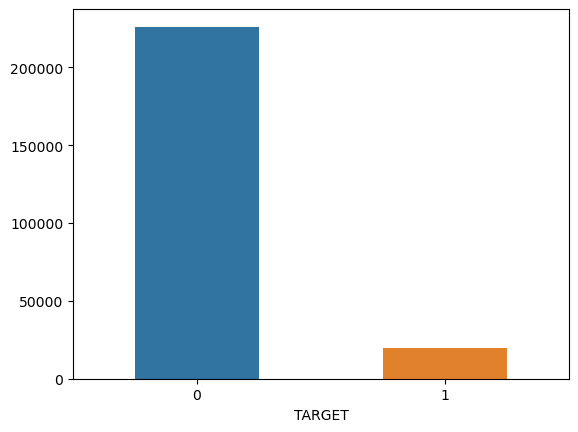

In [7]:
# distribution of TARGET
sns.barplot(data=app_train, x=app_train["TARGET"].value_counts().index, y=app_train["TARGET"].value_counts().values, width=0.5)

__COMMENTS__
* As we can see, this is an __imbalanced__ class problem. There are far more loans that were repaid on time (class 0) than loans that were not repaid (class 1).

__2. Basic information of each features__

In [8]:
train_test_numcols = train_test.select_dtypes(exclude='object')
train_test_objcols = train_test.select_dtypes(include='object')

In [9]:
ft.multi_features_explore(train_test_numcols)

index,dtype,nonnull,%nonnull,nan,%nan,nunique,nunique_nan,max,min,mean,std,unique,frequency,%value
SK_ID_CURR,int64,307511,1.00000,0,0.00000,307511,307511,307510,0,153755.00000,88770.92365,NaN,NaN,NaN
TARGET,float64,246009,0.80000,61502,0.20000,2,3,1.00000,0.00000,0.08079,0.27252,"[0.0, 1.0, nan]","{0.0: 226133, 1.0: 19876}","{0.0: 0.92, 1.0: 0.08}"
CNT_CHILDREN,int64,307511,1.00000,0,0.00000,15,15,19,0,0.41705,0.72212,NaN,NaN,NaN
AMT_INCOME_TOTAL,float64,307511,1.00000,0,0.00000,2548,2548,117000000.00000,25650.00000,168797.91930,237123.14628,NaN,NaN,NaN
AMT_CREDIT,float64,307511,1.00000,0,0.00000,5603,5603,4050000.00000,45000.00000,599025.99971,402490.77700,NaN,NaN,NaN
AMT_ANNUITY,float64,307499,1.00000,12,0.00000,13672,13673,258025.50000,1615.50000,27108.57391,14493.73732,NaN,NaN,NaN
AMT_GOODS_PRICE,float64,307233,1.00000,278,0.00000,1002,1003,4050000.00000,40500.00000,538396.20743,369446.46054,NaN,NaN,NaN
REGION_POPULATION_RELATIVE,float64,307511,1.00000,0,0.00000,81,81,0.07251,0.00029,0.02087,0.01383,NaN,NaN,NaN
DAYS_BIRTH,int64,307511,1.00000,0,0.00000,17460,17460,-7489,-25229,-16036.99507,4363.98863,NaN,NaN,NaN
DAYS_EMPLOYED,int64,307511,1.00000,0,0.00000,12574,12574,365243,-17912,63815.04590,141275.76652,NaN,NaN,NaN


__COMMENTS__
* Basically, the distribution of almost numerical features has no anomalies except for `DAYS_EMPLOYED`. `DAYS_EMPLOYED` represents "How many days BEFORE the application the person started current employment", so in theory, it is impossible for `DAYS_EMPLOYED` to contain positive values like `365243`. Moreover, those anomlies are not just a sign error because no one could have a working time of up to 365243 days, which is equivalent to approximately 1000 years.
* Hence, we will consider those anomalies as a missing value and before redefining it as a NaN value, we will create a new columns to capture all of records containing them.

In [10]:
# create a new columns to capture all of records containing anomaly
train_test['FLAG_DAYS_EMPLOYED_ANOM'] = (train_test["DAYS_EMPLOYED"] == 365243).astype(int)

In [11]:
ft.multi_features_explore(train_test_objcols)

index,dtype,nonnull,%nonnull,nan,%nan,nunique,nunique_nan,unique,frequency,%value,most
NAME_CONTRACT_TYPE,object,307511,1.00000,0,0.00000,2,2,"[Cash loans, Revolving loans]","{'Cash loans': 278232, 'Revolving loans': 29279}","{'Cash loans': 0.9, 'Revolving loans': 0.1}",[Cash loans]
CODE_GENDER,object,307511,1.00000,0,0.00000,3,3,"[F, M, XNA]","{'F': 202448, 'M': 105059, 'XNA': 4}","{'F': 0.66, 'M': 0.34, 'XNA': 0.0}",[F]
FLAG_OWN_CAR,object,307511,1.00000,0,0.00000,2,2,"[N, Y]","{'N': 202924, 'Y': 104587}","{'N': 0.66, 'Y': 0.34}",[N]
FLAG_OWN_REALTY,object,307511,1.00000,0,0.00000,2,2,"[N, Y]","{'Y': 213312, 'N': 94199}","{'Y': 0.69, 'N': 0.31}",[Y]
NAME_TYPE_SUITE,object,306219,1.00000,1292,0.00000,7,8,"[Family, Unaccompanied, Spouse, partner, Children, Other_A, nan, Group of people, Other_B]","{'Unaccompanied': 248526, 'Family': 40149, 'Spouse, partner': 11370, 'Children': 3267, 'Other_B': 1770, 'Other_A': 866, 'Group of people': 271}","{'Unaccompanied': 0.81, 'Family': 0.13, 'Spouse, partner': 0.04, 'Children': 0.01, 'Other_B': 0.01, 'Other_A': 0.0, 'Group of people': 0.0}",[Unaccompanied]
NAME_INCOME_TYPE,object,307511,1.00000,0,0.00000,8,8,"[State servant, Working, Pensioner, Commercial associate, Unemployed, Student, Businessman, Maternity leave]","{'Working': 158774, 'Commercial associate': 71617, 'Pensioner': 55362, 'State servant': 21703, 'Unemployed': 22, 'Student': 18, 'Businessman': 10, 'Maternity leave': 5}","{'Working': 0.52, 'Commercial associate': 0.23, 'Pensioner': 0.18, 'State servant': 0.07, 'Unemployed': 0.0, 'Student': 0.0, 'Businessman': 0.0, 'Maternity leave': 0.0}",[Working]
NAME_EDUCATION_TYPE,object,307511,1.00000,0,0.00000,5,5,"[Higher education, Secondary / secondary special, Incomplete higher, Lower secondary, Academic degree]","{'Secondary / secondary special': 218391, 'Higher education': 74863, 'Incomplete higher': 10277, 'Lower secondary': 3816, 'Academic degree': 164}","{'Secondary / secondary special': 0.71, 'Higher education': 0.24, 'Incomplete higher': 0.03, 'Lower secondary': 0.01, 'Academic degree': 0.0}",[Secondary / secondary special]
NAME_FAMILY_STATUS,object,307511,1.00000,0,0.00000,6,6,"[Married, Civil marriage, Single / not married, Widow, Separated, Unknown]","{'Married': 196432, 'Single / not married': 45444, 'Civil marriage': 29775, 'Separated': 19770, 'Widow': 16088, 'Unknown': 2}","{'Married': 0.64, 'Single / not married': 0.15, 'Civil marriage': 0.1, 'Separated': 0.06, 'Widow': 0.05, 'Unknown': 0.0}",[Married]
NAME_HOUSING_TYPE,object,307511,1.00000,0,0.00000,6,6,"[House / apartment, Rented apartment, With parents, Municipal apartment, Office apartment, Co-op apartment]","{'House / apartment': 272868, 'With parents': 14840, 'Municipal apartment': 11183, 'Rented apartment': 4881, 'Office apartment': 2617, 'Co-op apartment': 1122}","{'House / apartment': 0.89, 'With parents': 0.05, 'Municipal apartment': 0.04, 'Rented apartment': 0.02, 'Office apartment': 0.01, 'Co-op apartment': 0.0}",[House / apartment]
OCCUPATION_TYPE,object,211120,0.69000,96391,0.31000,18,19,"[Core staff, Laborers, Managers, nan, Drivers, Sales staff, Cleaning staff, Private service staff, Medicine staff, Security staff, Accountants, Cooking staff, High skill tech staff, Low-skill Laborers, Realty agents, Secretaries, Waiters/barmen staff, IT staff, HR staff]","{'Laborers': 55186, 'Sales staff': 32102, 'Core staff': 27570, 'Managers': 21371, 'Drivers': 18603, 'High skill tech staff': 11380, 'Accountants': 9813, 'Medicine staff': 8537, 'Security staff': 6721, 'Cooking staff': 5946, 'Cleaning staff': 4653, 'Private service staff': 2652, 'Low-skill Laborers': 2093, 'Waiters/barmen staff': 1348, 'Secretaries': 1305, 'Realty agents': 751, 'HR staff': 563, 'IT staff': 526}","{'Laborers': 0.26, 'Sales staff': 0.15, 'Core staff': 0.13, 'Managers': 0.1, 'Drivers': 0.09, 'High skill tech staff': 0.05, 'Accountants': 0.05, 'Medicine staff': 0.04, 'Security staff': 0.03, 'Cooking staff': 0.03, 'Cleaning staff': 0.02, '

__COMMENTS__
* As we can see, beside `np.nan`, there are some other values representing missing values, but not being defined by `np.nan`, such as `XNA` or `Unknown`. Replacing them with `np.nan` will make it easier for us in handling with missing data.

In [12]:
train_test = ft.replace_nan(data=train_test, missing_value=['XNA', 'Unknown', 365243])

__2. Check correlation of all numerical features with TARGET__

In [13]:
train_test_numcols = train_test.select_dtypes(exclude='object')
train_test_corr = ft.check_corr(train_test[train_test_numcols.columns[1:]], heatmap=False)['TARGET']

In [14]:
# Top 5 features (excluding TARGET) having highest correlation with TARGET
train_test_corr_top5 = abs(train_test_corr).sort_values(ascending=False).head(6)
train_test_corr_top5 = train_test_corr[train_test_corr_top5.index]
train_test_corr_top5

TARGET           1.00000
EXT_SOURCE_3    -0.18010
EXT_SOURCE_2    -0.15882
EXT_SOURCE_1    -0.15414
DAYS_BIRTH       0.07763
DAYS_EMPLOYED    0.07421
Name: TARGET, dtype: float64

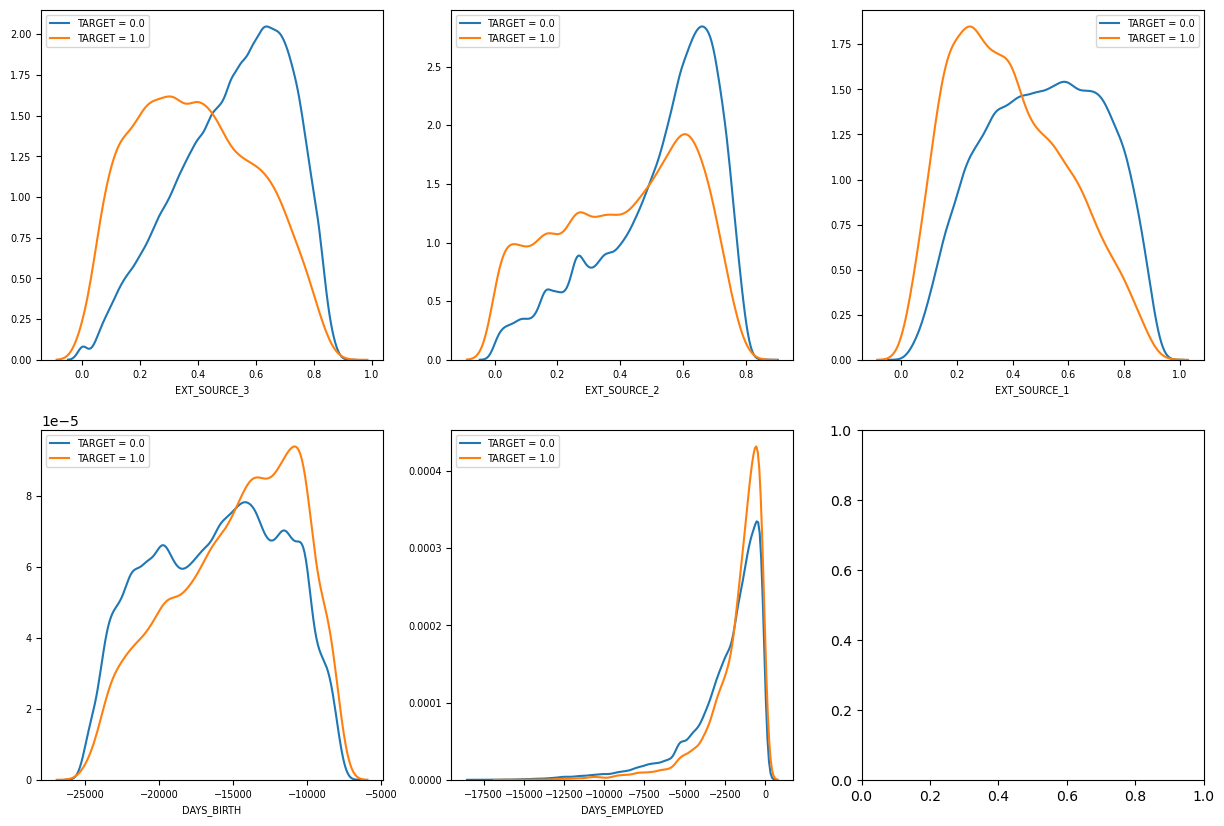

In [15]:
# Using kdeplot to visualize
ft.num_kdeplot(data=train_test, cols=list(train_test_corr_top5.index[1:]), color='TARGET',
               nrows=2, ncols=3, figsize=(15, 10), fontsize=7, limit=5)

__COMMENTS__
* Because the DAYS_BIRTHS contains negative values which represents information of age calculated by days, so we can convert it into positive years to have a clearer view of the effect that clients' age having on `TARGET`.
* As we can see, people with young age (range 20-30, especially people in 30s) tends to have loan default more than people with older age, so we can create a new feature to capture this pattern.

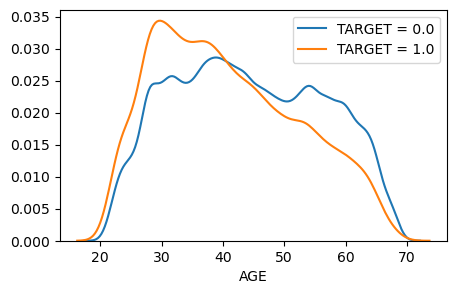

In [19]:
train_age = train_test[['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH']].copy()
train_age['AGE'] = train_age['DAYS_BIRTH']/-365.25
ft.num_kdeplot(data=train_age, cols=['AGE'], color='TARGET', figsize=(5, 3))

__3. Checking for missing values__

In [16]:
train_test_nan = ft.check_nan(train_test)
print("There are {}/{} features containing NaN values.".format(train_test_nan.shape[0], train_test.shape[1]))
print("There are {}/{} features containing more than 40% NaN values.".format(train_test_nan[train_test_nan['%nan']>40].shape[0], train_test.shape[1]))
train_test_nan

There are 72/123 features containing NaN values.
There are 49/123 features containing more than 40% NaN values.


,nan,%nan
COMMONAREA_AVG,214865,69.87230
COMMONAREA_MODE,214865,69.87230
COMMONAREA_MEDI,214865,69.87230
NONLIVINGAPARTMENTS_MEDI,213514,69.43296
NONLIVINGAPARTMENTS_AVG,213514,69.43296
NONLIVINGAPARTMENTS_MODE,213514,69.43296
FONDKAPREMONT_MODE,210295,68.38617
LIVINGAPARTMENTS_MODE,210199,68.35495
LIVINGAPARTMENTS_AVG,210199,68.35495
LIVINGAPARTMENTS_MEDI,210199,68.35495


__COMMENTS__
* As we can see, there are 71/123 features containing `NaN` values (not including `TARGET`) and 49/71 are containing more than 40% and most of them represents "Normalized information about building where the client lives", except for `EXT_SOURCE_1`, which is also one of top 5 features having high correlation with `TARGET`.
* Hence, we will drop all the features containing more than 40% `NaN` values, except for `EXT_SOURCE_1` (which are also features about building where the client lives).

In [17]:
drop_cols = [x for x in train_test_nan[train_test_nan['%nan']>40].index if x not in train_test_corr_top5.index]
train_test = train_test.drop(drop_cols, axis=1)
print("Shape of dataset after droping:", train_test.shape)

Shape of dataset after droping: (307511, 75)


__4. Creating some new features__

In [18]:
# average income per capita of each client's family
train_test['AMT_INCOME_PER_PERSON'] = train_test['AMT_INCOME_TOTAL']/train_test['CNT_FAM_MEMBERS']

# the estimated number of installments that a client has to pay based on total amount credit and amount annuity
train_test['CNT_APPR_INSTALL'] = train_test['AMT_CREDIT']/train_test['AMT_ANNUITY']

# the ratio of amount annuity to the total income of each client
train_test['PER_ANNUITY_INCOME'] = train_test['AMT_ANNUITY']/train_test['AMT_INCOME_TOTAL']

# the ratio of amount annuity to the income per capita of each client
train_test['PER_ANNUITY_INCOME_P_PERSON'] = train_test['AMT_ANNUITY']/train_test['AMT_INCOME_PER_PERSON']

# estimated age of each client at the last time they changed their registration
train_test['DAYS_BIRTHS_WHEN_LASTEST_CHANGE_REGIST'] = train_test['DAYS_BIRTH']-train_test['DAYS_REGISTRATION']

# the ratio of days employed to days birth
train_test['PER_DAYS_EMP_BIRTH'] = train_test['DAYS_EMPLOYED']/train_test['DAYS_BIRTH']

# flags if the client is more than 30 years old
train_test['FlAG_AGE_GREATER_30'] = (train_test['DAYS_BIRTH']/-365.25).apply(lambda x: 1 if x > 30 else 0)

# flags if the client has more than 5 years working experience with their current job
train_test['FLAG_EMPLOYMENT_GREATER_5'] = (train_test['DAYS_EMPLOYED']/-365.25).apply(lambda x: 1 if x > 5 else 0)

__5. Scaling Numerical Data__

In [19]:
train_test.iloc[:, 2:] = ft.scale_df_full(train_test.iloc[:, 2:], method='standard')

__6. Filling missing data__

In [21]:
# filling missing 'OCCUPATION_TYPE' values based on related categorical columns
train_test_filled = ft.fillna_occupation(train_test)
train_test_filled

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DAYS_EMPLOYED_ANOM,AMT_INCOME_PER_PERSON,CNT_APPR_INSTALL,PER_ANNUITY_INCOME,PER_ANNUITY_INCOME_P_PERSON,DAYS_BIRTHS_WHEN_LASTEST_CHANGE_REGIST,PER_DAYS_EMP_BIRTH,FlAG_AGE_GREATER_30,FLAG_EMPLOYMENT_GREATER_5,OCCUPATION_TYPE
0,278621,0.00000,Cash loans,F,N,N,-0.57754,0.42679,1.72545,0.59267,1.59997,Family,State servant,Higher education,Married,House / apartment,-1.25275,-0.16682,0.51154,1.07870,1.79085,0.00180,0.46870,-0.49901,0.04324,1.59934,-0.24522,-0.16764,-2.06757,-2.05181,MONDAY,-0.32562,-0.12400,-0.23127,-0.20587,-0.29121,-0.54724,-0.46781,School,-0.90430,0.56450,NaN,-0.17586,-0.32107,-0.17031,-0.27616,0.16311,-0.00650,0.63907,-0.00902,-0.12388,-0.31074,-0.01385,-0.29763,-0.06254,-0.00477,-0.06267,-0.00255,-0.05948,-0.05427,-0.03480,-0.10014,-0.01633,-0.09053,-0.02440,-0.02253,-0.01830,-0.07636,-0.06320,-0.16788,-0.29192,-0.33433,-1.01641,-0.46863,0.41327,1.86888,-0.51508,-0.45412,-0.98230,-0.64396,0.41503,-0.77709,Core staff
1,139008,0.00000,Cash loans,F,N,Y,-0.57754,-0.14253,-0.71143,0.17787,-0.65340,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-0.92899,-0.68011,-0.28004,-1.37583,0.36914,0.00180,0.46870,-0.49901,0.04324,-0.62526,-0.24522,-0.16764,-0.10306,-0.06270,WEDNESDAY,1.51159,-0.12400,-0.23127,-0.20587,-0.29121,-0.54724,-0.46781,Business Entity Type 3,NaN,0.71208,NaN,0.24063,-0.32107,0.24990,-0.27616,0.41831,-0.00650,0.63907,-0.00902,-0.12388,-0.31074,-0.01385,-0.29763,-0.06254,-0.00477,-0.06267,-0.00255,-0.05948,-0.05427,-0.03480,-0.10014,-0.01633,-0.09053,-0.02440,-0.02253,-0.01830,NaN,NaN,NaN,NaN,NaN,NaN,-0.46863,-0.25259,-1.41613,0.41206,0.15857,0.40759,0.02279,0.41503,1.28685,Laborers
2,138348,0.00000,Cash loans,M,N,Y,-0.57754,-0.19947,-0.21373,-0.36175,-0.06874,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.56357,-0.89253,-0.27961,0.19164,-0.30726,0.00180,0.46870,-0.49901,0.04324,-0.62526,-0.24522,-1.26572,-0.10306,-0.06270,THURSDAY,-0.32562,-0.12400,-0.23127,-0.20587,-0.29121,1.82737,2.13760,Religion,NaN,-1.00311,NaN,-0.59236,-0.32107,-0.59051,-0.27616,-0.17313,-0.00650,-1.56479,-0.00902,-0.12388,-0.31074,-0.01385,3.35986,-0.06254,-0.00477,-0.06267,-0.00255,-0.05948,-0.05427,-0.03480,-0.10014,-0.01633,-0.09053,-0.02440,-0.02253,-0.01830,-0.07636,-0.06320,-0.16788,-0.29192,-0.33433,-1.01641,-0.46863,0.28009,0.23637,-0.01023,-0.74924,-0.99141,-0.03327,0.41503,1.28685,Core staff
3,64140,0.00000,Cash loans,M,N,Y,-0.57754,-0.29435,-0.26965,0.02821,-0.22709,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,1.07900,-0.20715,0.34048,0.00458,1.66763,0.00180,0.46870,2.00

In [22]:
# Separate object and numerical columns for different fillna strategy
train_test_numcols = train_test_filled.select_dtypes(exclude='object').columns[2:]
train_test_objcols = train_test_filled.select_dtypes(include='object').columns

# filling missing other object columns using most frequent values
train_test_filled[train_test_objcols] = ft.fillna(train_test_filled[train_test_objcols], strategy='most_frequent')

# filling missing other numerical columns using median values
train_test_filled[train_test_numcols] = ft.fillna(train_test_filled[train_test_numcols], strategy='mean')

__7. Encoding categorical data__

In [23]:
# basic mode means using LabelEncoder with features having less than 2 unique values and OneHot for the rest
train_test_final = ft.specific_encode(train_test_filled, basic_mode=True)

In [24]:
train_test_final

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DAYS_EMPLOYED_ANOM,AMT_INCOME_PER_PERSON,CNT_APPR_INSTALL,PER_ANNUITY_INCOME,PER_ANNUITY_INCOME_P_PERSON,DAYS_BIRTHS_WHEN_LASTEST_CHANGE_REGIST,PER_DAYS_EMP_BIRTH,FlAG_AGE_GREATER_30,FLAG_EMPLOYMENT_GREATER_5,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZ

__8. Saving files__

In [26]:
train_test_final.to_csv("prepared_files/dp_traintest.csv")